In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

In [46]:
df = pd.read_csv('attributes.csv', delimiter=';')
df.head(5)
df.columns

Index(['CLIENT', 'GROUP_', 'AGE_CP_DAYS', 'DAYS_FROM_LAST_PURCHASE',
       'COMMUNICATIONS_SENT', 'COMMUNICATIONS_DELIVERED', 'PURCHASE_DAYS',
       'PURCHASE_DAYS_PROMO', 'PURCHASE_SUMMA', 'TOTAL_DISCOUNT',
       'PROMO_DISCOUNT', 'PURCHASE_UNITS', 'PURCHASE_UNITS_FULLPRICE',
       'PURCHASE_UNITS_30_DISCOUNT', 'PURCHASE_UNITS_50_DISCOUNT',
       'PURCHASE_UNITS_APPARELL', 'PURCHASE_UNITS_FOOTWEAR',
       'PURCHASE_UNITS_EQUIPMENT', 'PURCHASE_UNITS_KIDS', 'PURCHASE_UNITS_MEN',
       'PURCHASE_UNITS_WOMEN', 'BONUS_SUMMA_GIFT', 'BONUS_SUMMA_FOR_PURCHASE',
       'BONUS_SPENT_GIFT', 'BONUS_SPENT_FOR_PURCHASE'],
      dtype='object')

In [25]:
full_profit = df['PURCHASE_SUMMA'].sum()
print(full_profit)
pdf = df[df['PURCHASE_SUMMA'] > 0][['PURCHASE_DAYS', 'PURCHASE_SUMMA', 'PURCHASE_UNITS']].sort_values('PURCHASE_SUMMA', ascending=False)
pdf['profit_prc'] = pdf['PURCHASE_SUMMA']/(full_profit/100)
pdf['profit_sum_prc'] = pdf['profit_prc'].cumsum()
bins = np.arange(0,101, 10)
labels = [10,20,30,40,50,60,70,80,90,100]
pdf['percent_group'] = pd.cut(pdf['profit_sum_prc'], bins, labels=labels)
pdf.head(5)

1319024236.949999


,PURCHASE_DAYS,PURCHASE_SUMMA,PURCHASE_UNITS,profit_prc,profit_sum_prc,percent_group
67750,83,481800.5,350,0.036527,0.036527,10
59647,23,439535.0,105,0.033323,0.069850,10
45785,79,428858.0,396,0.032513,0.102363,10
60544,30,390412.0,193,0.029599,0.131962,10
34462,57,389929.0,202,0.029562,0.161524,10


In [26]:
grp_df = pdf.groupby('percent_group').agg({'PURCHASE_SUMMA': 'sum', 'PURCHASE_UNITS': 'sum', 'profit_prc': 'count'})

In [27]:
grp_df = grp_df.reset_index()
grp_df.head(5)

,percent_group,PURCHASE_SUMMA,PURCHASE_UNITS,profit_prc
0,10,1.317954e+08,117215,775
1,20,1.319785e+08,128194,1356
2,30,1.318971e+08,130320,1890
3,40,1.319157e+08,133878,2476
4,50,1.318964e+08,141473,3171


In [55]:
grp_df = grp_df.rename(columns={'profit_prc':'client_count'})


In [70]:
grp_df['client_cumsum'] = grp_df['client_count'].cumsum()
grp_df['profit_percent'] = grp_df['percent_group'].astype(int)

Сколько клиентов приносит прибыль в процентном отношении

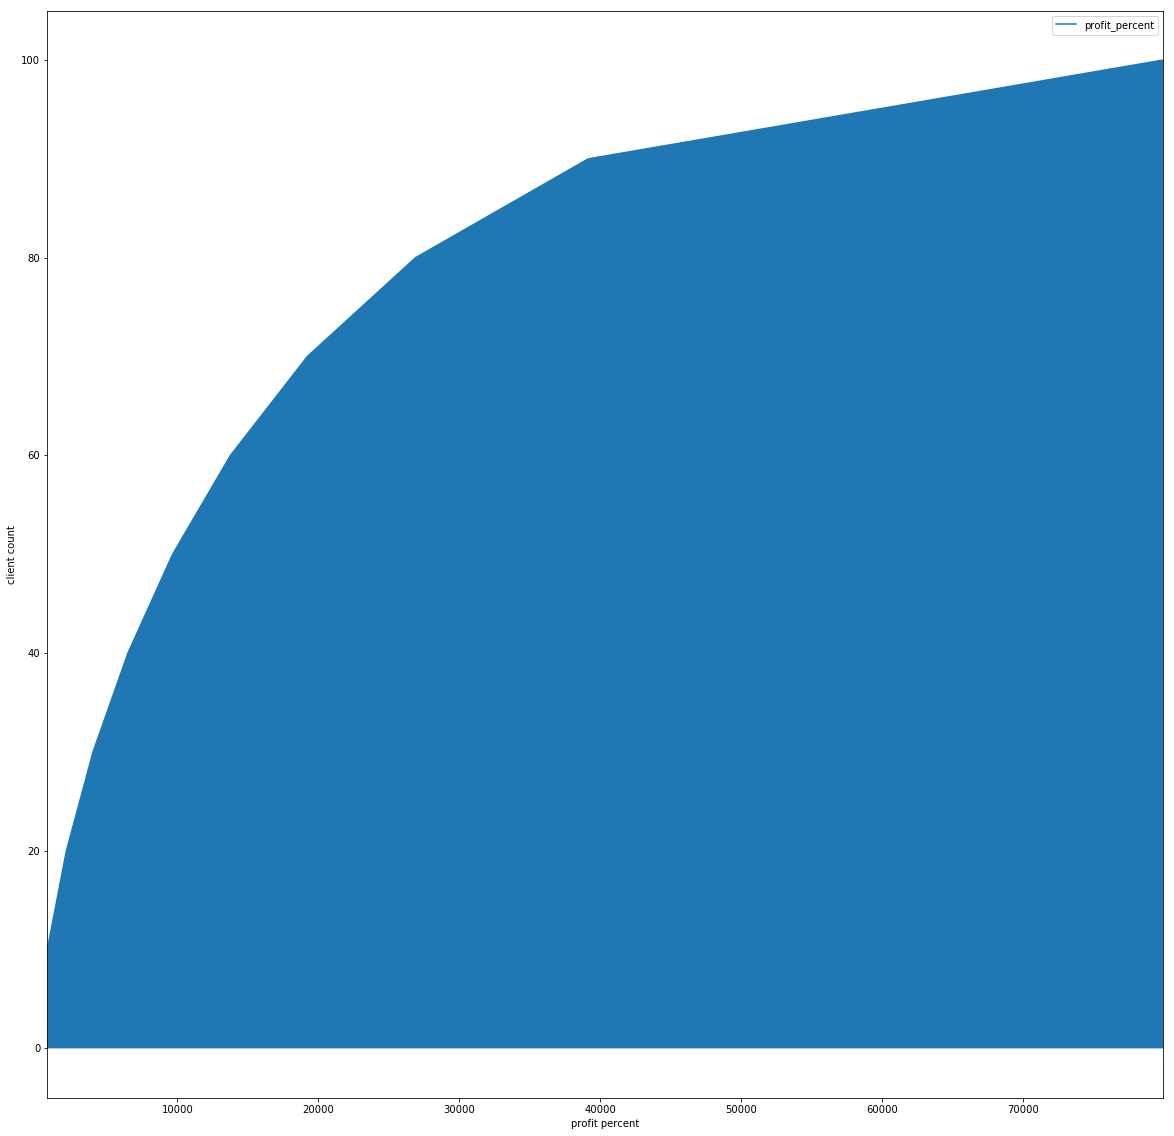

In [71]:
#fig, ax1= plt.subplots(1, 1)
#ax1.figsize=(20, 20)

#,df['PURCHASE_UNITS_KIDS'],df['PURCHASE_UNITS_MEN'],df['PURCHASE_UNITS_WOMEN']
#df.sort_values()
#grp_df['percent_group'].astype(int)
#grp_df['percent_group']+10
ax = grp_df.plot(y='profit_percent',x='client_cumsum', figsize=(20, 20), )
ax.set_xlabel("profit percent")
ax.set_ylabel("client count")  
ax.fill_between(grp_df['client_cumsum'], 0, grp_df['profit_percent'])
#df[['PURCHASE_UNITS']].stackplot()
